In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller

In [6]:
df=pd.read_csv("D://DATASETS//daily-total-female-births.csv")
df.head()

,Date,Births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [7]:
df.set_index('Date',inplace=True)
df.index=pd.to_datetime(df.index)
df.dropna(inplace=True)

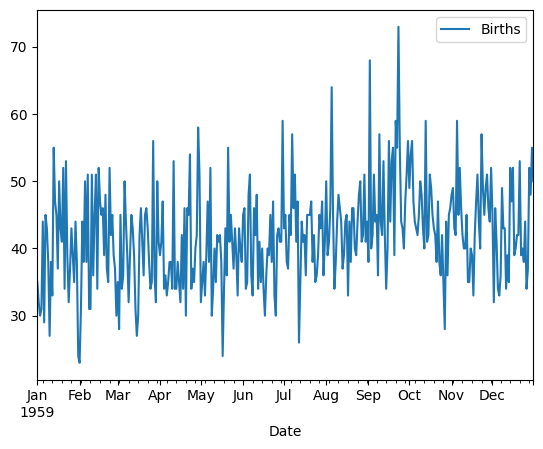

In [8]:
df.plot()
plt.show()

In [10]:
x=df.values

In [11]:
result=adfuller(x)

In [14]:
print("ADF Statistics:",result[0])
print("p-value",result[1])
print("critical values:")
for i,j in result[4].items():
    print(i,j)

ADF Statistics: -4.808291253559765
p-value 5.2434129901498554e-05
critical values:
1% -3.448748905151901
5% -2.8696473721448728
10% -2.5710891239349585


In [22]:
sampoo=pd.read_csv("D:\\DATASETS\\shampoo_sales.csv")
sampoo.head()

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3


In [23]:
sampoo["Month"] = "200" + sampoo["Month"]

In [25]:
sampoo.head()

,Month,Sales
0,2001-01,266.0
1,2001-02,145.9
2,2001-03,183.1
3,2001-04,119.3
4,2001-05,180.3


In [27]:
sampoo.set_index("Month",inplace=True)
sampoo.index=pd.to_datetime(sampoo.index)
sampoo.dropna(inplace=True)

In [38]:
sampoo.head()

,Sales
Month,
2001-01-01,266.0
2001-02-01,145.9
2001-03-01,183.1
2001-04-01,119.3
2001-05-01,180.3


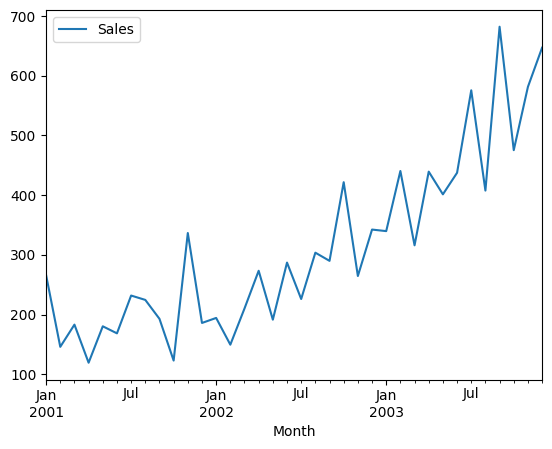

In [29]:
sampoo.plot()
plt.show()

In [36]:
def difference(data,col,interval):
    diff=[]
    column_data=data[col].to_list()
    for i in range(interval,len(column_data)):
        value=column_data[i]-column_data[i-interval]
        diff.append(value)
    return pd.Series([None]*interval+diff,index=data.index)

In [40]:
sampoo['diff_1']=difference(sampoo,'Sales',1)

In [42]:
sampoo.head()

,Sales,diff_1
Month,,
2001-01-01,266.0,NaN
2001-02-01,145.9,-120.1
2001-03-01,183.1,37.2
2001-04-01,119.3,-63.8
2001-05-01,180.3,61.0


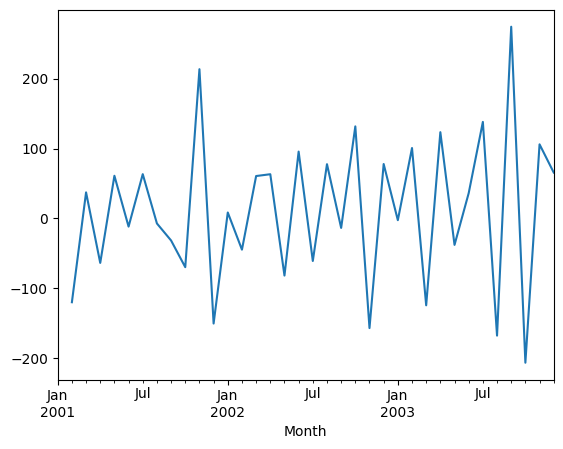

In [46]:
sampoo['diff_1'].plot()
plt.show()

In [43]:
sampoo['diff_2']=difference(sampoo,'Sales',2)

In [44]:
sampoo.head()

,Sales,diff_1,diff_2
Month,,,
2001-01-01,266.0,NaN,NaN
2001-02-01,145.9,-120.1,NaN
2001-03-01,183.1,37.2,-82.9
2001-04-01,119.3,-63.8,-26.6
2001-05-01,180.3,61.0,-2.8


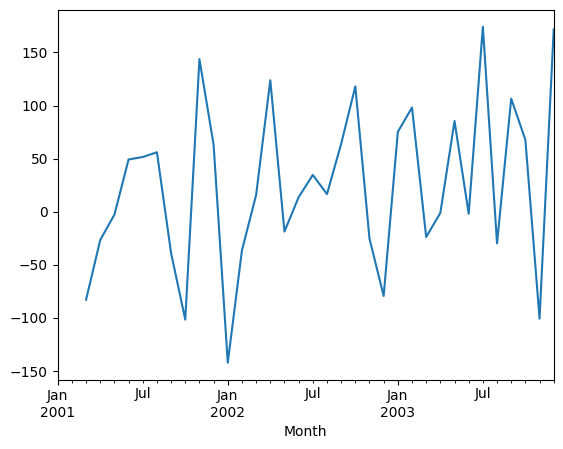

In [47]:
sampoo['diff_2'].plot()
plt.show()